In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample=pd.read_csv("../input/sample_submission.csv")

In [3]:
sample.shape

(9463187, 5)

In [4]:
parcelids=sample['ParcelId'].values
len(parcelids)

9463187

In [5]:
df=dd.read_parquet('../input/scratch/tax_history_2007to2017_v2.parq') 

In [6]:
def f(subdf):
    subdf=subdf.set_index('parcelid')
    return (subdf,)

In [7]:
%time list_df=df.groupby('assessmentyear').apply(lambda u: f(u)).compute()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  if __name__ == '__main__':


CPU times: user 3min 30s, sys: 1min 2s, total: 4min 32s
Wall time: 1min 48s


In [8]:
list_df.shape

(11,)

In [9]:
tmp=list_df

In [10]:
tmp.iloc[0][0].iloc[0,0]

2007

In [11]:
lst_df={u[0].iloc[0,0]:u[0] for u in tmp}

In [12]:
lst_df.keys()

[2016, 2017, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [13]:
def get_col(col):
    cols=sorted(lst_df.keys())
    subdf=pd.concat([lst_df[k][col] for k in cols],axis=1)
    subdf.columns=cols
    subdf=subdf.reindex(parcelids,copy=False)
    return subdf 

In [14]:
def explore_col(col):
    subdf=get_col(col)
    print col, "shape", subdf.shape
    a=(~subdf.isnull()).sum(1)
    print "non-null count of parcelid"
    a.hist(bins=100);plt.show()
    print "non-null ratio of parcelid"
    b=a.value_counts().to_frame().sort_index().T/len(a)
    b.index=[col]
    display(b)

    print "null ratio by year"
    b=subdf.isnull().mean(0).to_frame().T
    b.index=[col]
    display(b)

    print "stat of year-to-year change"
    diffdf=np.log(subdf).diff(axis=1)
    a=diffdf.mean(0)
    b=diffdf.median(0)
    c=diffdf.std(0)
    tmp=pd.concat([a,b,c],1)
    tmp.columns=['mean','median','std']
    display(tmp.T)
    a.plot();b.plot();plt.show()
    c.plot();plt.show()

    tmp=pd.concat([(diffdf>0).mean(),(diffdf<0).mean(),(diffdf==0).mean(),(diffdf.isnull()).mean()],axis=1)
    tmp.columns=['percent of diff>0','percent of diff<0','percent of diff==0','percent of diff is null']
    tmp.plot()

    a=(~subdf.isnull()).astype(np.float16)
    b=a.diff(axis=1)
    tmp=(b<0).sum(0).to_frame().T/len(b)
    tmp.index=['missing from last year']
    display(tmp)
    tmp.T.plot();plt.show()
    print "\n"



### brief explore

##### taxratecodearea
taxratecodearea shape (9463187, 11)
non-null count of parcelid


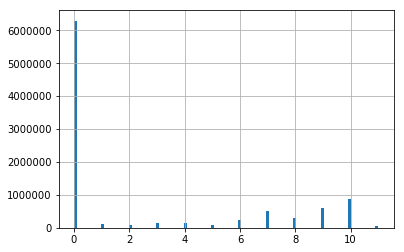

non-null ratio of parcelid


0         1         2        3         4         5   \
taxratecodearea  0.664734  0.012053  0.009304  0.01631  0.014815  0.010013   

                       6        7         8         9         10        11  
taxratecodearea  0.026287  0.05297  0.032808  0.064518  0.090893  0.005296

null ratio by year


2007      2008      2009     2010      2011      2012  \
taxratecodearea  0.762728  0.791825  0.792647  0.73451  0.740405  0.757864   

                     2013      2014      2015      2016      2017  
taxratecodearea  0.771483  0.743994  0.707239  0.711367  0.958206

stat of year-to-year change


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN -0.106644 -0.017425 -0.000775  0.175442 -0.051065  0.000036   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.722081  0.311004  0.056905  0.726469  0.512377  0.011257   

            2014      2015      2016      2017  
mean    0.177728  0.000022  0.000003 -0.000002  
median  0.000000  0.000000  0.000000  0.000000  
std     0.875997  0.007203  0.004351  0.005292

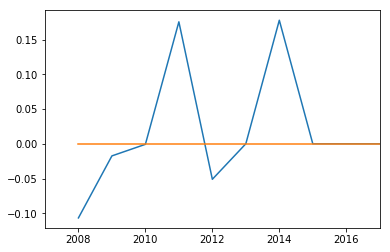

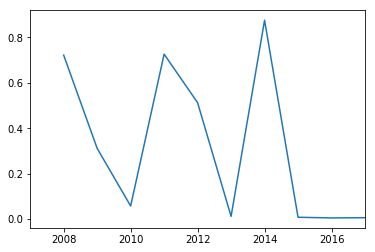

2007      2008      2009    2010      2011      2012  \
missing from last year   0.0  0.047055  0.053152  0.0017  0.038911  0.046655   

                            2013      2014     2015     2016      2017  
missing from last year  0.018247  0.033335  0.00486  0.00977  0.254946

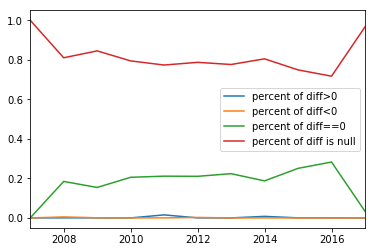

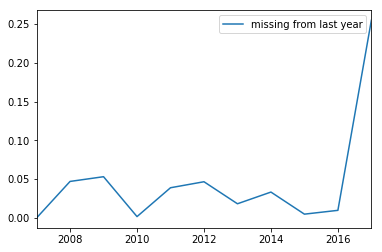



##### improvementmarketvalue
improvementmarketvalue shape (9463187, 11)
non-null count of parcelid


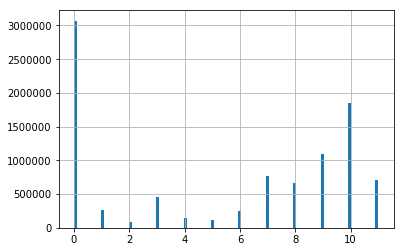

non-null ratio of parcelid


0         1         2         3         4   \
improvementmarketvalue  0.324426  0.028408  0.008591  0.048188  0.015365   

                              5         6        7         8         9   \
improvementmarketvalue  0.012194  0.026221  0.08069  0.070833  0.114971   

                              10        11  
improvementmarketvalue  0.194753  0.075361

null ratio by year


2007      2008      2009      2010      2011  \
improvementmarketvalue  0.568014  0.525481  0.532533  0.447115  0.443119   

                            2012      2013      2014      2015      2016  \
improvementmarketvalue  0.482111  0.485395  0.521009  0.381879  0.364692   

                            2017  
improvementmarketvalue  0.836014

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.006820 -0.105858 -0.019947 -0.031710 -0.025256  0.025414   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.180018  0.258551  0.153609  0.222231  0.211857  0.194394   

            2014      2015      2016      2017  
mean   -0.013336 -0.001387  0.027695  0.002664  
median  0.000000  0.000000  0.000000  0.000000  
std     0.132163  0.143674  0.158891  0.170412

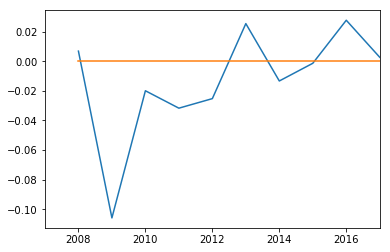

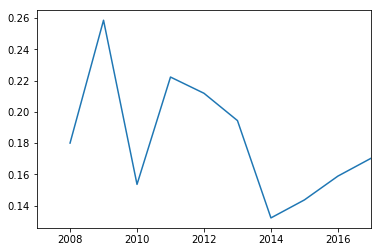

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.011029  0.063313  0.016792  0.016731   

                            2012      2013      2014      2015      2016  \
missing from last year  0.061764  0.022136  0.134209  0.011859  0.004957   

                            2017  
missing from last year  0.490149

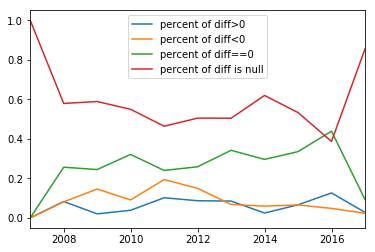

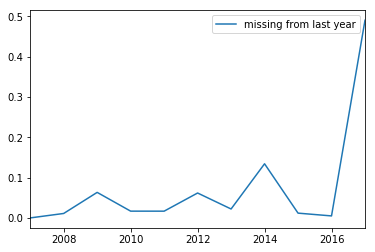



##### structuretaxvaluedollarcnt
structuretaxvaluedollarcnt shape (9463187, 11)
non-null count of parcelid


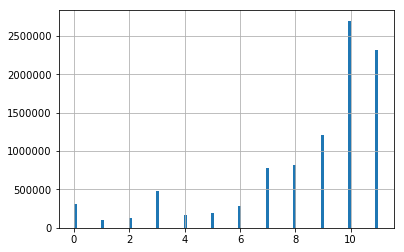

non-null ratio of parcelid


0         1         2         3         4   \
structuretaxvaluedollarcnt  0.032323  0.011061  0.012938  0.050321  0.017909   

                                 5         6         7         8         9   \
structuretaxvaluedollarcnt  0.01977  0.029705  0.081931  0.086473  0.127309   

                                  10        11  
structuretaxvaluedollarcnt  0.284991  0.245269

null ratio by year


2007      2008      2009      2010      2011  \
structuretaxvaluedollarcnt  0.300003  0.249487  0.255888  0.147969  0.142628   

                               2012      2013      2014      2015      2016  \
structuretaxvaluedollarcnt  0.17167  0.209398  0.273364  0.087063  0.071315   

                                2017  
structuretaxvaluedollarcnt  0.595641

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.013748 -0.073465 -0.017205 -0.020116 -0.019543  0.025899   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.189752  0.252016  0.184286  0.207506  0.203193  0.192484   

            2014      2015      2016      2017  
mean    0.008687  0.034368  0.029133  0.023920  
median  0.000000  0.000000  0.000000  0.019797  
std     0.155863  0.219790  0.169237  0.181284

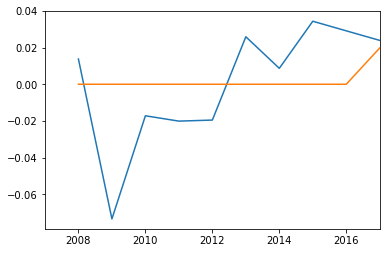

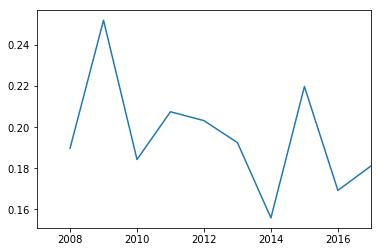

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.014846  0.070926  0.013931  0.017032   

                            2012      2013      2014     2015      2016  \
missing from last year  0.058112  0.060673  0.189513  0.02182  0.014155   

                            2017  
missing from last year  0.545456

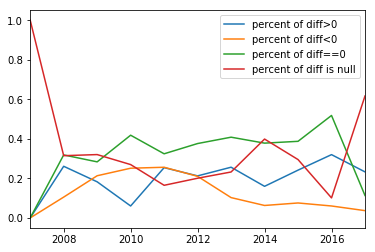

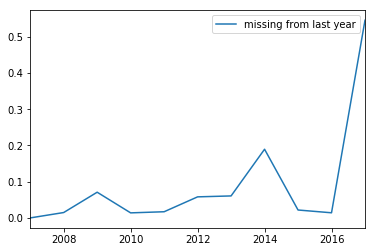



##### totalassessedvalue
totalassessedvalue shape (9463187, 11)
non-null count of parcelid


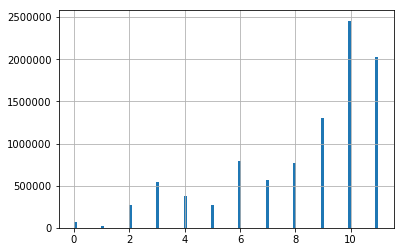

non-null ratio of parcelid


0         1       2         3         4         5   \
totalassessedvalue  0.007253  0.002691  0.0281  0.057579  0.039256  0.028443   

                         6         7         8       9         10        11  
totalassessedvalue  0.08396  0.059722  0.081783  0.1378  0.259636  0.213777

null ratio by year


2007      2008      2009      2010      2011  \
totalassessedvalue  0.414057  0.325498  0.288011  0.167671  0.160316   

                        2012      2013      2014      2015      2016      2017  
totalassessedvalue  0.183265  0.225572  0.262794  0.055559  0.045388  0.576823

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.040249 -0.003250  0.008218 -0.001491 -0.024751  0.016698   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.262507  0.239734  0.196821  0.184512  0.231442  0.192744   

            2014      2015      2016      2017  
mean    0.018663  0.039774  0.015536  0.035493  
median  0.000000  0.000000  0.000000  0.019796  
std     0.197495  0.253070  0.240477  0.234249

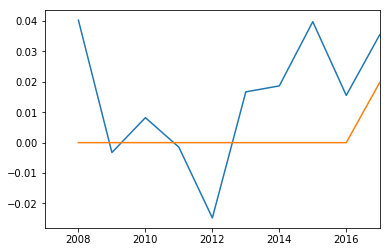

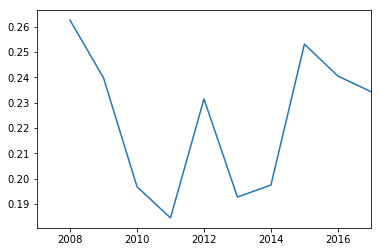

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.013425  0.059764  0.014098  0.026245   

                            2012      2013      2014      2015      2016  \
missing from last year  0.057287  0.067782  0.199539  0.030775  0.026467   

                            2017  
missing from last year  0.551145

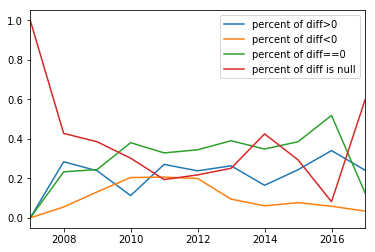

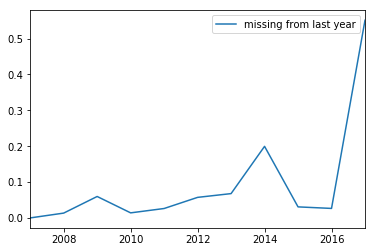



##### totalappraisedvalue
totalappraisedvalue shape (9463187, 11)
non-null count of parcelid


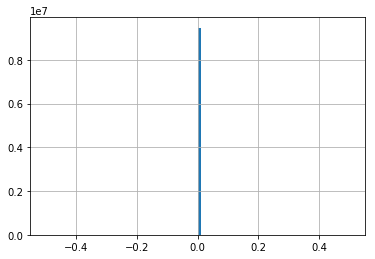

non-null ratio of parcelid


0
totalappraisedvalue  1.0

null ratio by year


2007  2008  2009  2010  2011  2012  2013  2014  2015  \
totalappraisedvalue   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                     2016  2017  
totalappraisedvalue   1.0   1.0

stat of year-to-year change


2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
mean     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
median   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
std      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

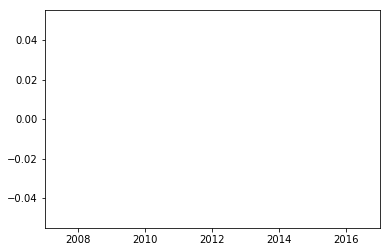

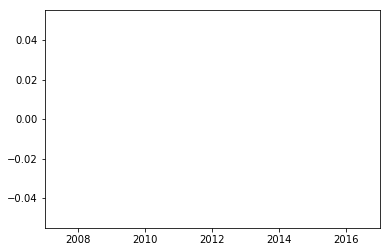

2007  2008  2009  2010  2011  2012  2013  2014  2015  \
missing from last year   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                        2016  2017  
missing from last year   0.0   0.0

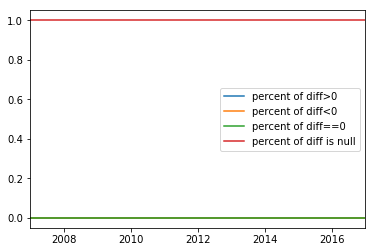

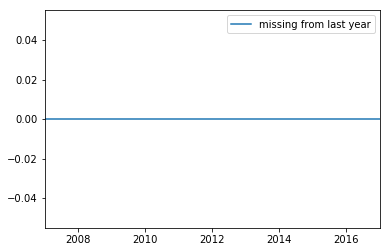



##### taxdelinquencyamount
taxdelinquencyamount shape (9463187, 11)
non-null count of parcelid


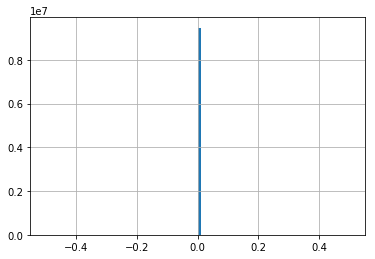

non-null ratio of parcelid


0
taxdelinquencyamount  1.0

null ratio by year


2007  2008  2009  2010  2011  2012  2013  2014  2015  \
taxdelinquencyamount   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                      2016  2017  
taxdelinquencyamount   1.0   1.0

stat of year-to-year change


2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
mean     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
median   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
std      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

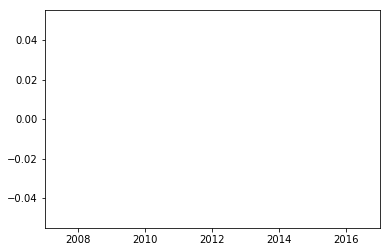

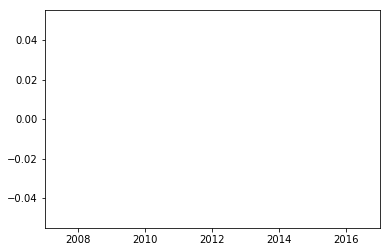

2007  2008  2009  2010  2011  2012  2013  2014  2015  \
missing from last year   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                        2016  2017  
missing from last year   0.0   0.0

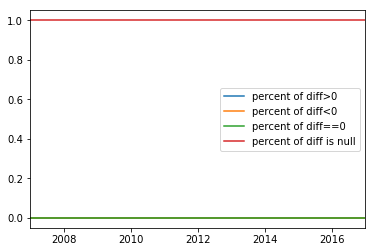

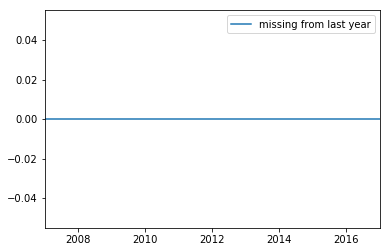



##### taxamount
taxamount shape (9463187, 11)
non-null count of parcelid


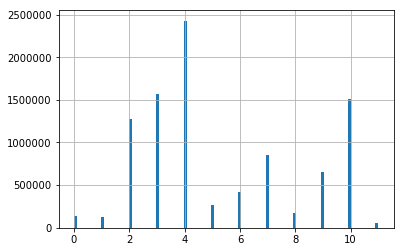

non-null ratio of parcelid


0         1         2         3         4         5   \
taxamount  0.014434  0.012777  0.134543  0.165239  0.256528  0.028535   

                 6         7         8         9         10        11  
taxamount  0.044093  0.090327  0.018514  0.069658  0.159154  0.006201

null ratio by year


2007      2008      2009      2010      2011      2012  \
taxamount  0.680994  0.663162  0.727156  0.665445  0.665389  0.684819   

               2013      2014      2015      2016      2017  
taxamount  0.657635  0.266656  0.065412  0.057812  0.587537

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.049501 -0.050795  0.022428 -0.009530  0.061858  0.023131   
median   NaN  0.024451  0.001410  0.007318  0.004300  0.000000  0.011165   
std      NaN  0.303568  0.471074  0.577448  0.559326  0.466148  0.323690   

            2014      2015      2016      2017  
mean   -0.139580  0.016986  0.030694  0.055154  
median  0.006898  0.000000  0.000000  0.011564  
std     0.970586  0.307757  0.279299  0.347132

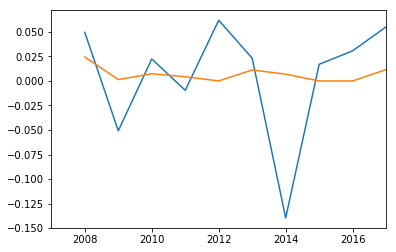

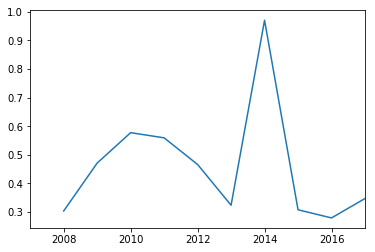

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.012868  0.086188  0.029394  0.024983   

                            2012      2013      2014      2015      2016  \
missing from last year  0.065566  0.029563  0.051461  0.029329  0.024447   

                            2017  
missing from last year  0.561283

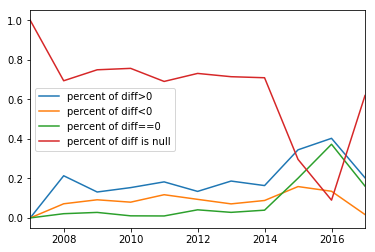

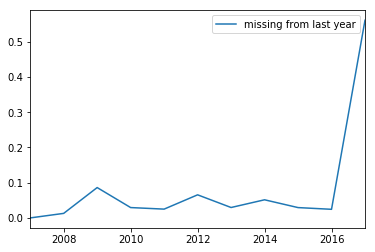



##### improvementappraisedvalue
improvementappraisedvalue shape (9463187, 11)
non-null count of parcelid


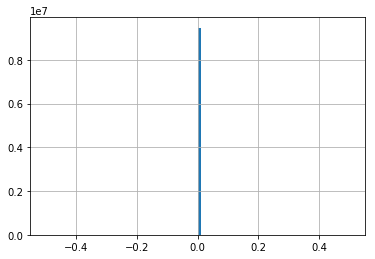

non-null ratio of parcelid


0
improvementappraisedvalue  1.0

null ratio by year


2007  2008  2009  2010  2011  2012  2013  2014  \
improvementappraisedvalue   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                           2015  2016  2017  
improvementappraisedvalue   1.0   1.0   1.0

stat of year-to-year change


2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
mean     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
median   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
std      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

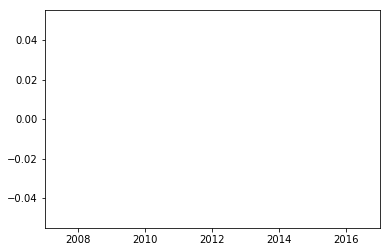

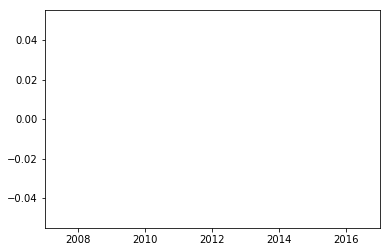

2007  2008  2009  2010  2011  2012  2013  2014  2015  \
missing from last year   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                        2016  2017  
missing from last year   0.0   0.0

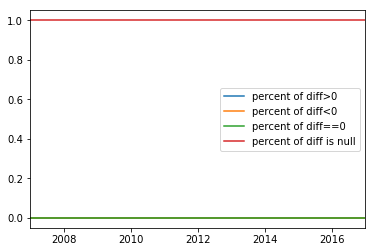

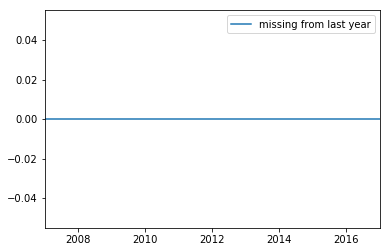



##### taxvaluedollarcnt
taxvaluedollarcnt shape (9463187, 11)
non-null count of parcelid


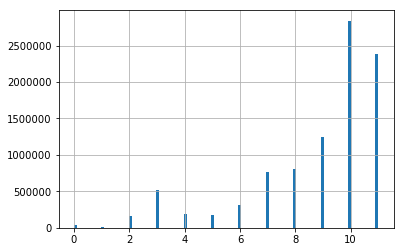

non-null ratio of parcelid


0        1         2         3        4         5   \
taxvaluedollarcnt  0.004292  0.00104  0.016535  0.055426  0.01956  0.018761   

                         6         7         8         9         10        11  
taxvaluedollarcnt  0.033475  0.081597  0.085333  0.131984  0.300222  0.251776

null ratio by year


2007      2008      2009      2010      2011      2012  \
taxvaluedollarcnt  0.27976  0.230319  0.232692  0.126789  0.120328  0.148607   

                       2013      2014      2015      2016      2017  
taxvaluedollarcnt  0.195017  0.239299  0.037405  0.028555  0.574498

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.040959 -0.013758 -0.000048 -0.006744 -0.017567  0.013067   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.252328  0.229518  0.197819  0.191828  0.204554  0.181007   

            2014      2015      2016      2017  
mean    0.016987  0.037182  0.029741  0.034953  
median  0.000000  0.000000  0.000000  0.019796  
std     0.188921  0.246269  0.196871  0.233958

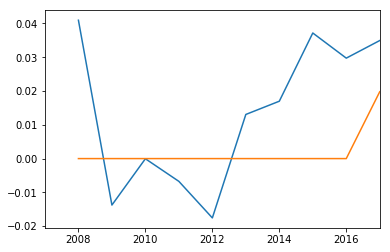

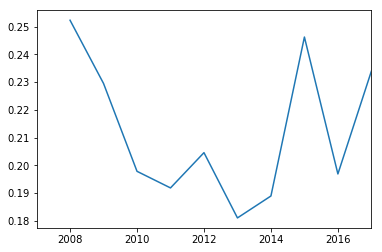

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.015053  0.066877  0.014158  0.015958   

                            2012      2013      2014      2015      2016  \
missing from last year  0.057702  0.067858  0.190522  0.022502  0.019303   

                            2017  
missing from last year  0.565609

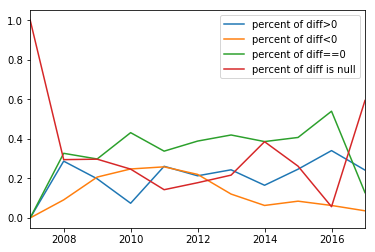

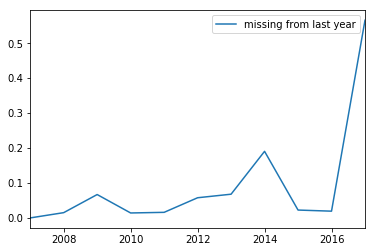



##### edition
edition shape (9463187, 11)
non-null count of parcelid


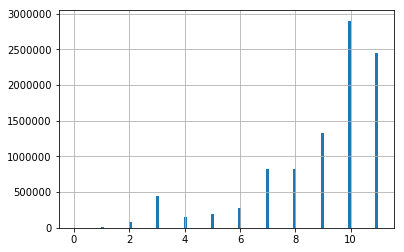

non-null ratio of parcelid


0         1         2         3        4         5         6   \
edition  0.00001  0.000588  0.007942  0.046411  0.01575  0.019912  0.029925   

               7         8         9        10        11  
edition  0.086771  0.087446  0.140446  0.30657  0.258229

null ratio by year


2007      2008     2009      2010     2011      2012      2013  \
edition  0.249164  0.205813  0.20972  0.103037  0.09652  0.125821  0.174475   

             2014      2015      2016      2017  
edition  0.235701  0.031529  0.022801  0.570406

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.098181  0.084852  0.089336  0.095597  0.079714  0.069064   
median   NaN  0.068993  0.064539  0.060625  0.057158  0.054067  0.051293   
std      NaN  0.107531  0.067784  0.097457  0.116877  0.076923  0.051680   

            2014      2015      2016      2017  
mean    0.062156  0.059279  0.055873  0.050595  
median  0.051293  0.048790  0.044452  0.040822  
std     0.039006  0.033612  0.028743  0.024141

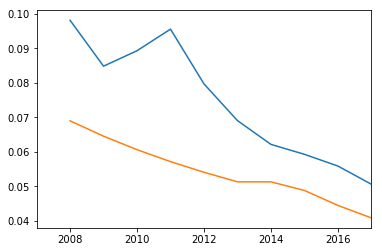

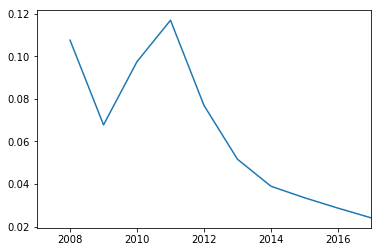

2007      2008      2009     2010      2011      2012  \
missing from last year   0.0  0.017098  0.066801  0.01412  0.016292  0.059175   

                            2013      2014     2015      2016      2017  
missing from last year  0.068219  0.201512  0.02155  0.018157  0.567255

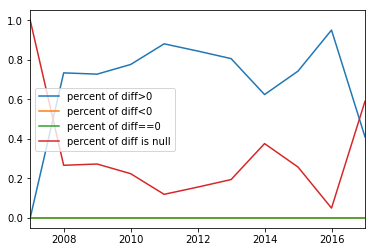

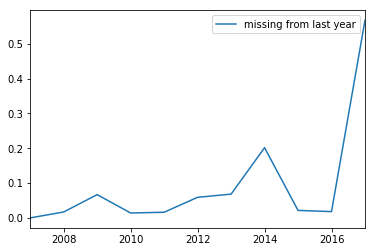



##### landassessedvalue
landassessedvalue shape (9463187, 11)
non-null count of parcelid


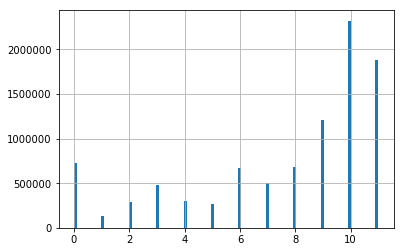

non-null ratio of parcelid


0         1         2         3         4        5   \
landassessedvalue  0.076608  0.014537  0.030742  0.050782  0.032203  0.02816   

                         6        7         8         9         10        11  
landassessedvalue  0.070901  0.05291  0.071571  0.127102  0.245285  0.199199

null ratio by year


2007      2008     2009      2010      2011      2012  \
landassessedvalue  0.438149  0.348952  0.32326  0.218935  0.218354  0.245973   

                       2013      2014      2015      2016    2017  
landassessedvalue  0.283406  0.336485  0.153001  0.146403  0.6328

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.080117  0.074945  0.014127  0.008455 -0.031129 -0.003440   
median   NaN  0.019756  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.268135  0.335371  0.196766  0.199653  0.256506  0.215606   

            2014      2015      2016      2017  
mean    0.020813  0.035947  0.008783  0.040144  
median  0.000000  0.000000  0.000000  0.019795  
std     0.175790  0.244744  0.178676  0.243451

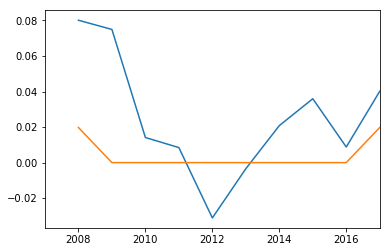

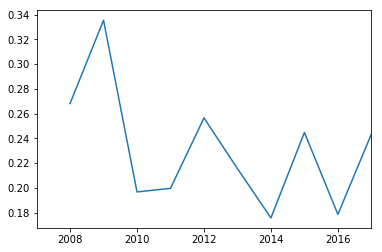

2007      2008      2009      2010      2011     2012  \
missing from last year   0.0  0.012797  0.061876  0.012989  0.024639  0.06032   

                            2013      2014      2015      2016      2017  
missing from last year  0.060612  0.188791  0.029965  0.023261  0.507171

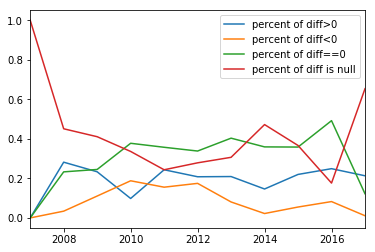

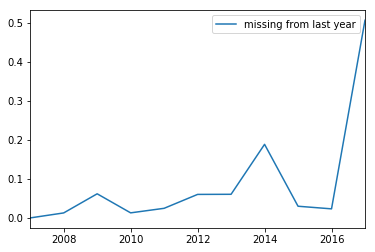



##### taxdelinquencyyear
taxdelinquencyyear shape (9463187, 11)
non-null count of parcelid


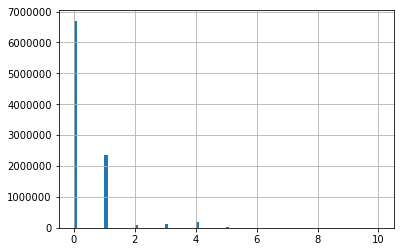

non-null ratio of parcelid


0         1         2         3         4   \
taxdelinquencyyear  0.708296  0.248147  0.008223  0.011928  0.019225   

                          5         6         7         8         9         10  
taxdelinquencyyear  0.001847  0.000749  0.000619  0.000425  0.000357  0.000185

null ratio by year


2007      2008      2009      2010      2011  \
taxdelinquencyyear  0.998011  0.997626  0.996911  0.996009  0.992431   

                        2012      2013      2014      2015    2016      2017  
taxdelinquencyyear  0.979024  0.758866  0.963944  0.961243  0.9616  0.990535

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.000631  0.000139  0.000244  0.000268  0.000211       NaN   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000 -5.208492   
std      NaN  0.005281  0.000395  0.000385  0.000486  0.000504       NaN   

        2014  2015  2016      2017  
mean     NaN   NaN   NaN  0.002245  
median   0.0   0.0   0.0  0.000000  
std      NaN   NaN   NaN  0.028382

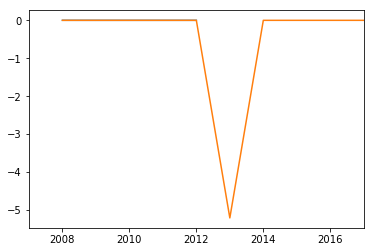

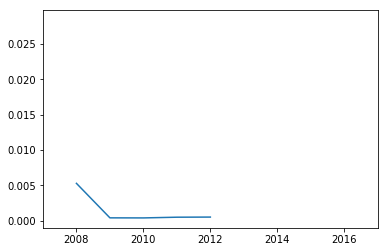

2007      2008     2009      2010      2011      2012  \
missing from last year   0.0  0.000868  0.00148  0.001191  0.001563  0.005344   

                            2013      2014     2015      2016      2017  
missing from last year  0.017472  0.223576  0.00667  0.005477  0.031457

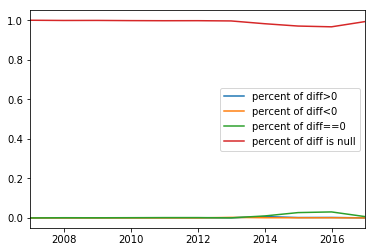

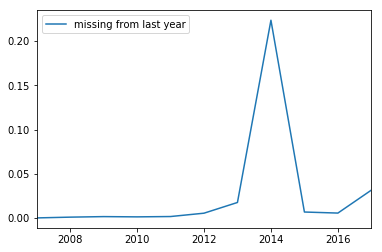



##### landappraisedvalue
landappraisedvalue shape (9463187, 11)
non-null count of parcelid


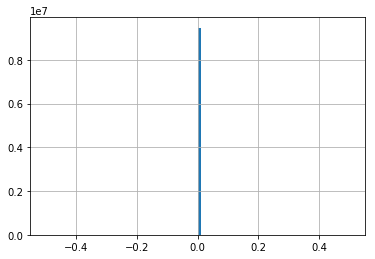

non-null ratio of parcelid


0
landappraisedvalue  1.0

null ratio by year


2007  2008  2009  2010  2011  2012  2013  2014  2015  \
landappraisedvalue   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                    2016  2017  
landappraisedvalue   1.0   1.0

stat of year-to-year change


2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
mean     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
median   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
std      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

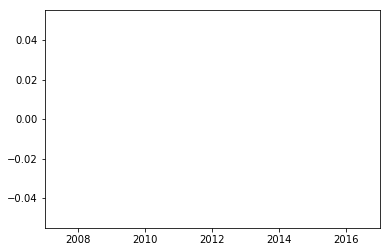

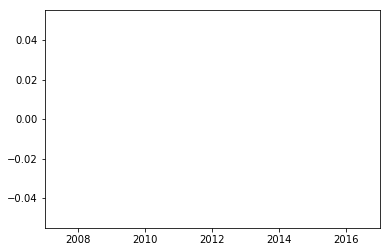

2007  2008  2009  2010  2011  2012  2013  2014  2015  \
missing from last year   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                        2016  2017  
missing from last year   0.0   0.0

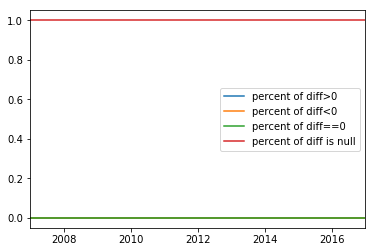

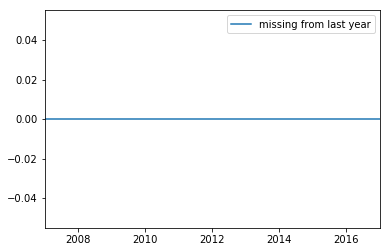



##### totalmarketvalue
totalmarketvalue shape (9463187, 11)
non-null count of parcelid


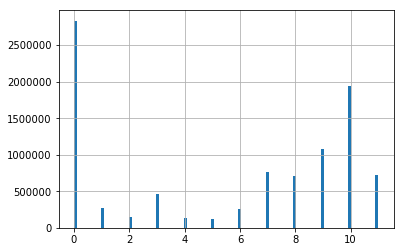

non-null ratio of parcelid


0        1         2         3         4         5   \
totalmarketvalue  0.299454  0.02925  0.016094  0.048758  0.014638  0.012276   

                        6         7         8         9         10        11  
totalmarketvalue  0.027686  0.079998  0.075519  0.114058  0.205466  0.076803

null ratio by year


2007     2008      2009      2010      2011      2012  \
totalmarketvalue  0.55469  0.51177  0.517131  0.433346  0.429472  0.467774   

                      2013      2014      2015      2016    2017  
totalmarketvalue  0.474101  0.506194  0.363469  0.340341  0.8178

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.038887 -0.014528  0.001436 -0.016453 -0.025461 -0.001209   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.209882  0.169204  0.143944  0.176104  0.169112  0.131436   

            2014      2015      2016      2017  
mean   -0.005375  0.000467  0.022600  0.015621  
median  0.000000  0.000000  0.000000  0.000000  
std     0.143460  0.154641  0.148083  0.246636

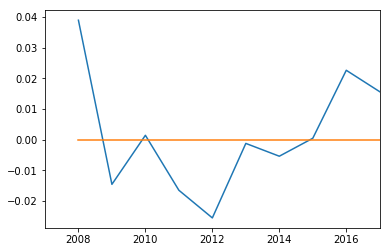

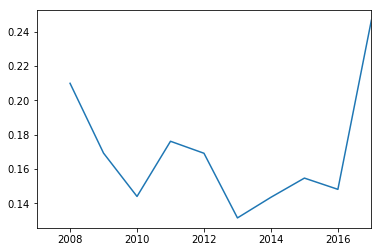

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.011256  0.062033  0.017415  0.016737   

                            2012      2013      2014      2015      2016  \
missing from last year  0.061895  0.024589  0.135038  0.010847  0.008948   

                            2017  
missing from last year  0.501064

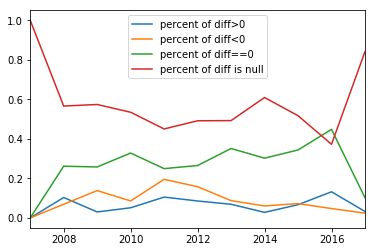

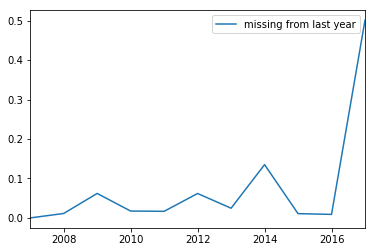



##### improvementassessedvalue
improvementassessedvalue shape (9463187, 11)
non-null count of parcelid


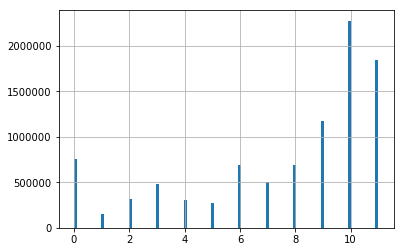

non-null ratio of parcelid


0         1        2         3        4   \
improvementassessedvalue  0.079637  0.016084  0.03348  0.050918  0.03248   

                                5         6         7         8         9   \
improvementassessedvalue  0.028958  0.073361  0.053543  0.072594  0.124314   

                                10        11  
improvementassessedvalue  0.240312  0.194319

null ratio by year


2007      2008      2009     2010      2011  \
improvementassessedvalue  0.449915  0.360718  0.333681  0.22917  0.227246   

                              2012      2013      2014      2015      2016  \
improvementassessedvalue  0.256569  0.290095  0.342985  0.159228  0.150532   

                              2017  
improvementassessedvalue  0.634187

stat of year-to-year change


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.012888 -0.071599 -0.010222 -0.017157 -0.027109  0.032782   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.187808  0.241953  0.170211  0.187982  0.219020  0.196876   

            2014      2015      2016      2017  
mean    0.010772  0.039082  0.001056  0.027606  
median  0.000000  0.000000  0.000000  0.019797  
std     0.162875  0.227317  0.362822  0.180595

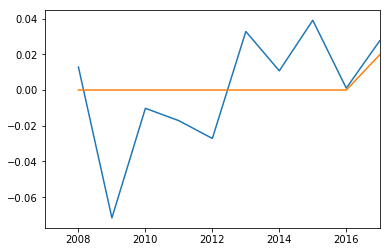

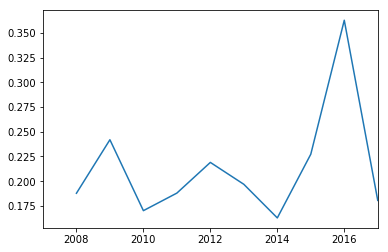

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.012608  0.061355  0.013535  0.024387   

                            2012      2013      2014      2015      2016  \
missing from last year  0.060687  0.059118  0.188869  0.029763  0.023339   

                            2017  
missing from last year  0.504793

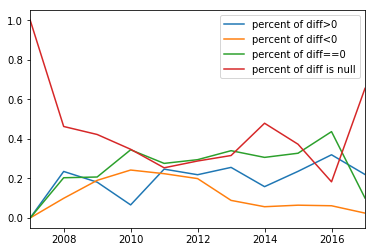

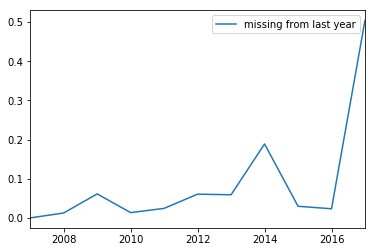



##### landtaxvaluedollarcnt
landtaxvaluedollarcnt shape (9463187, 11)
non-null count of parcelid


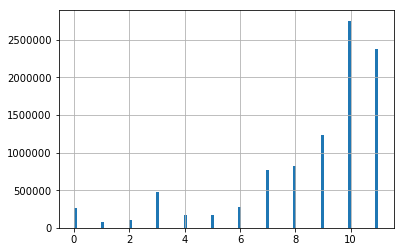

non-null ratio of parcelid


0         1         2         3         4   \
landtaxvaluedollarcnt  0.028007  0.007836  0.010491  0.049968  0.018531   

                             5         6         7         8         9   \
landtaxvaluedollarcnt  0.018007  0.028708  0.080637  0.086968  0.129715   

                             10        11  
landtaxvaluedollarcnt  0.290714  0.250417

null ratio by year


2007      2008     2009      2010      2011  \
landtaxvaluedollarcnt  0.286469  0.235877  0.24482  0.134872  0.132345   

                           2012      2013      2014     2015      2016  \
landtaxvaluedollarcnt  0.160906  0.201485  0.263575  0.07771  0.064999   

                           2017  
landtaxvaluedollarcnt  0.592442

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.078955  0.053647  0.004369  0.000176 -0.022538 -0.006700   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.255703  0.291634  0.183247  0.201961  0.225534  0.203751   

            2014      2015      2016      2017  
mean    0.016574  0.030854  0.013407  0.038554  
median  0.000000  0.000000  0.000000  0.019794  
std     0.165030  0.229405  0.164931  0.236774

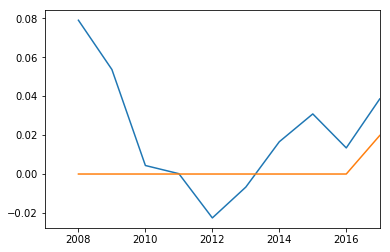

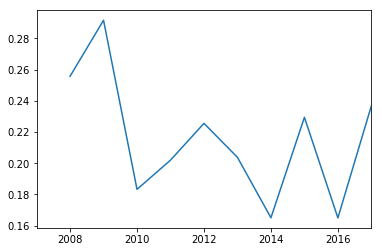

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.014811  0.071893  0.013419  0.018224   

                            2012      2013      2014      2015      2016  \
missing from last year  0.057597  0.061595  0.189129  0.021728  0.014542   

                            2017  
missing from last year  0.547948

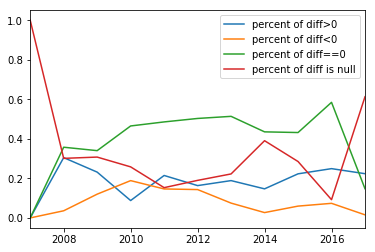

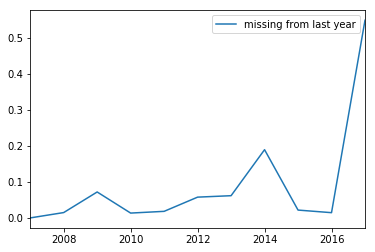



##### landmarketvalue
landmarketvalue shape (9463187, 11)
non-null count of parcelid


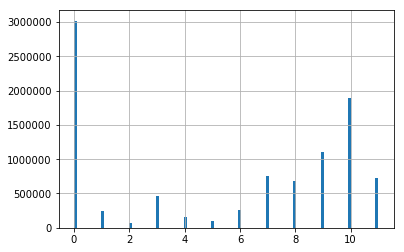

non-null ratio of parcelid


0         1         2         3         4         5   \
landmarketvalue  0.318814  0.025901  0.006863  0.048568  0.016466  0.010694   

                       6         7         8        9         10        11  
landmarketvalue  0.026779  0.079408  0.072389  0.11736  0.200442  0.076316

null ratio by year


2007      2008      2009      2010      2011      2012  \
landmarketvalue  0.558609  0.515934  0.524914  0.437606  0.435616  0.473639   

                     2013      2014      2015      2016      2017  
landmarketvalue  0.478493  0.512055  0.372837  0.357978  0.831879

stat of year-to-year change


2007      2008      2009      2010      2011      2012      2013  \
mean     NaN  0.097450  0.099124  0.008684 -0.006516 -0.033729 -0.034653   
median   NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std      NaN  0.232831  0.274032  0.115329  0.187849  0.191434  0.168403   

            2014      2015      2016      2017  
mean   -0.005504 -0.011244 -0.000067  0.006536  
median  0.000000  0.000000  0.000000  0.000000  
std     0.091330  0.124067  0.097402  0.191677

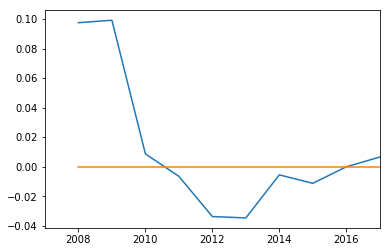

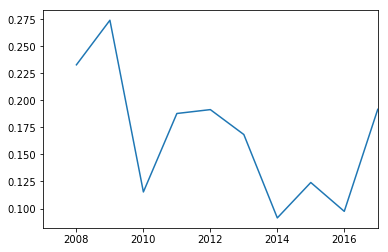

2007      2008      2009      2010      2011  \
missing from last year   0.0  0.011044  0.064151  0.016872  0.017977   

                            2012      2013      2014      2015    2016    2017  
missing from last year  0.061389  0.022888  0.133873  0.011732  0.0053  0.4924

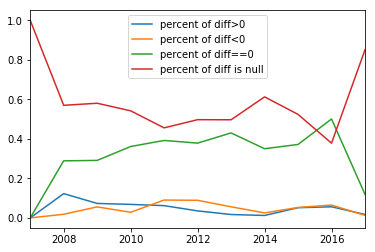

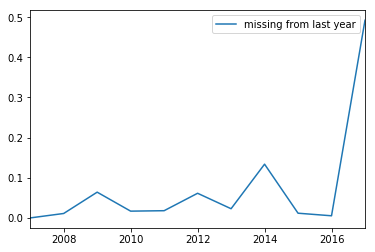

In [103]:
for col in df.columns:
    if col in ['assessmentyear','parcelid']:  continue
    print "#####", col
    explore_col(col)

In [168]:
print "landappraisedvalue, improvementappraisedvalue, taxdelinquencyamount,taxdelinquencyyear are all null"

landappraisedvalue, improvementappraisedvalue, taxdelinquencyamount,taxdelinquencyyear are all null


In [112]:
(~df[['landappraisedvalue','improvementappraisedvalue','taxdelinquencyamount',
     'totalappraisedvalue']].isnull()).sum(0).compute()

landappraisedvalue           0
improvementappraisedvalue    0
taxdelinquencyamount         0
totalappraisedvalue          0
dtype: int64

### taxdelinquencyyear

In [116]:
subdf=get_col('taxdelinquencyyear')
subdf=subdf[subdf.isnull().mean(1)<1]

In [128]:
print "{:.2f}% properties have delinquency history".format(subdf.shape[0]/9463187.*100)

29.17% properties have delinquency history


In [165]:
print '''After 2010, taxdelinquencyyear become weird. 
I doubt it is useful. Maybe trees can find something.
Also check how sales connect to it.
'''

After 2010, taxdelinquencyyear become weird. 
I doubt it is useful. Maybe trees can find something.
Also check how sales connect to it.



In [166]:
#subdf.iloc[np.where(subdf.loc[:,2017]==82)]

In [151]:
for col in subdf.columns:
    print col
    display(subdf.loc[:,col].value_counts().sort_index(ascending=False).to_frame())

2007


2007
2007.0  1475
2006.0  5223
2005.0  6286
2004.0  1995
2003.0  1146
2002.0   669
2001.0   505
2000.0   350
1999.0   320
1998.0   183
1997.0   113
1996.0    83
1995.0    70
1994.0    48
1993.0    22
1992.0    28
1991.0    19
1990.0    15
1989.0    15
1988.0    11
1987.0     9
1986.0    10
1985.0    16
1984.0     9
1982.0     5
1981.0     3
1980.0     1
1978.0     4
1958.0     1
1906.0   184

2008


2008
2008.0  2183
2007.0  8860
2006.0  4951
2005.0  2356
2004.0  1379
2003.0   824
2002.0   511
2001.0   362
2000.0   272
1999.0   251
1998.0   145
1997.0    90
1996.0    61
1995.0    55
1994.0    40
1993.0    19
1992.0    21
1991.0    12
1990.0    10
1989.0    10
1988.0     9
1987.0    10
1986.0     7
1985.0     7
1984.0    12
1982.0     3
1981.0     3
1980.0     1
1979.0     1
1978.0     2

2009


2009
2009.0   2240
2008.0  11732
2007.0   9241
2006.0   2378
2005.0   1164
2004.0    759
2003.0    467
2002.0    341
2001.0    208
2000.0    183
1999.0    158
1998.0     98
1997.0     53
1996.0     37
1995.0     40
1994.0     31
1993.0     14
1992.0     17
1991.0     10
1990.0      8
1989.0     11
1988.0      8
1987.0      7
1986.0      5
1985.0      4
1984.0     12
1982.0      2
1981.0      3
1979.0      1
1978.0      2

2010


2010
2010.0   1251
2009.0  14462
2008.0  12976
2007.0   3476
2006.0   1906
2005.0   1119
2004.0    760
2003.0    484
2002.0    343
2001.0    237
2000.0    202
1999.0    161
1998.0    109
1997.0     85
1996.0     37
1995.0     35
1994.0     29
1993.0     12
1992.0     16
1991.0     10
1990.0      9
1989.0     11
1988.0      6
1987.0      5
1986.0      5
1985.0      5
1984.0     12
1982.0      1
1981.0      3
1979.0      1
1978.0      2

2011


2011
2011.0   2665
2010.0  16940
2009.0   7555
2008.0   5202
2007.0   2228
2006.0   1370
2005.0    803
2004.0    602
2003.0    418
2002.0    291
2001.0    225
2000.0    170
1999.0    143
1998.0    105
1997.0     77
1996.0     34
1995.0     35
1994.0     24
1993.0     11
1992.0     14
1991.0      8
1990.0      9
1989.0      9
1988.0      4
1987.0      3
1986.0      5
1985.0      4
1984.0     10
1982.0      1
1981.0      2
1979.0      1
1978.0      2
99.0        2
97.0        1
96.0        1
93.0        1
92.0        1
91.0        1
89.0        1
88.0        1
86.0        1
13.0     2311
12.0     1055
11.0      571
10.0      363
9.0       226
8.0       177
7.0        91
6.0        72
5.0        38
4.0        81
3.0        14
2.0         3
1.0         5
0.0     27644

2012


2012
2012.0    1674
2011.0   19368
2010.0    6411
2009.0    4180
2008.0    3582
2007.0    1635
2006.0    1010
2005.0     572
2004.0     487
2003.0     323
2002.0     290
2001.0     166
2000.0     124
1999.0     118
1998.0      81
1997.0      63
1996.0      29
1995.0      25
1994.0      19
1993.0       8
1992.0      14
1991.0       7
1990.0      10
1989.0       7
1988.0       4
1987.0       4
1986.0       4
1985.0       4
1984.0       9
1982.0       1
1981.0       2
1978.0       2
99.0         5
98.0         5
97.0         7
96.0         4
95.0         3
94.0         1
93.0         1
92.0         3
13.0       436
12.0      3398
11.0       707
10.0      6217
9.0         70
8.0         24
7.0         19
6.0         23
5.0         15
4.0          8
3.0          6
2.0          4
1.0          1
0.0     147311

2013


2013
2012.0     3515
2011.0     2969
2010.0      828
2009.0      498
2008.0      397
2007.0      313
2006.0      244
2005.0      152
2004.0      133
2003.0      143
2002.0       51
2001.0       52
2000.0       18
1999.0       23
1998.0       11
1997.0        5
1996.0        6
1995.0        4
1992.0        3
1989.0        1
1988.0        1
1987.0        2
1985.0        1
1980.0        1
1975.0        1
99.0         40
98.0         12
97.0         37
96.0          5
95.0          2
94.0          2
93.0          2
92.0          1
90.0          1
89.0          3
88.0          2
87.0          1
82.0          1
81.0          1
14.0       6517
13.0       7372
12.0      17575
11.0      27766
10.0      60363
9.0       12753
8.0         846
7.0         448
6.0         639
5.0         248
4.0         263
3.0         146
2.0         108
1.0          60
0.0     2137312

2014


2014
99.0      88
98.0      56
97.0      64
96.0      26
95.0      34
94.0      21
93.0      15
92.0      38
91.0       9
90.0       9
89.0      13
88.0      19
87.0      11
86.0       1
85.0       3
84.0       3
83.0       7
82.0       8
81.0       3
80.0       4
78.0       1
74.0       1
61.0       1
15.0     742
14.0   20186
13.0  102487
12.0   30979
11.0   82662
10.0   72335
9.0    18230
8.0     4651
7.0     2755
6.0     1746
5.0     1213
4.0     1338
3.0      689
2.0      391
1.0      243
0.0      122

2015


2015
99.0    182
98.0    158
97.0    308
96.0     39
95.0     35
94.0     21
93.0     18
92.0     38
91.0      9
90.0      9
89.0     16
88.0     23
87.0     12
86.0      2
85.0      4
84.0      3
83.0      9
82.0      8
81.0      4
80.0      3
78.0      1
74.0      1
61.0      1
15.0  23480
14.0  43889
13.0  75401
12.0  32594
11.0  82246
10.0  76512
9.0   17825
8.0    4250
7.0    3015
6.0    2226
5.0    1592
4.0    1274
3.0     715
2.0     399
1.0     245
0.0     200

2016


2016
99.0    179
98.0    151
97.0    299
96.0     32
95.0     33
94.0     20
93.0     16
92.0     33
91.0      8
90.0      8
89.0     12
88.0     21
87.0     10
86.0      1
85.0      4
84.0      3
83.0      8
82.0      6
81.0      4
80.0      2
78.0      1
74.0      1
61.0      1
16.0  20901
15.0  38919
14.0  26491
13.0  58569
12.0  27791
11.0  80120
10.0  76331
9.0   16881
8.0    3860
7.0    2954
6.0    2184
5.0    1251
4.0     886
3.0     705
2.0     382
1.0     276
0.0    4037

2017


2017
99.0    136
98.0    127
97.0    250
96.0     25
95.0     24
94.0     14
93.0     12
92.0     27
91.0      5
90.0      6
89.0      8
88.0     15
87.0      7
86.0      2
85.0      3
84.0      3
83.0      9
82.0      5
81.0      2
80.0      2
74.0      1
61.0      1
16.0  12316
15.0  11819
14.0   9081
13.0  18979
12.0  16278
11.0   5371
10.0   3749
9.0    2357
8.0    1695
7.0    1673
6.0     976
5.0     745
4.0     534
3.0     348
2.0     181
1.0     177
0.0    2603

In [167]:
if 0:
    print "try to fix it"
    for col in subdf.columns:
        print col
        s=subdf.loc[:,col]
        s=(s<20)*(s+2000)+(s>=1000)*s+((s>=20) & (s<1000))*(s+1000)
        display(s.value_counts().sort_index(ascending=False).to_frame())

### taxratecodearea

In [15]:
subdf=get_col('taxratecodearea')
subdf=subdf[subdf.isnull().mean(1)<1]

In [16]:
subdf.head()

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                  
47141426  45.0  45.0  45.0  45.0  45.0  45.0  45.0   NaN  45.0  45.0  45.0
47141786  38.0  38.0  38.0  38.0  38.0  38.0  38.0   NaN  38.0  38.0  38.0
47143530  60.0  60.0  60.0  60.0  60.0  60.0  60.0   NaN  60.0  60.0  60.0
47143997   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  90.0  90.0  90.0
47144285   NaN   NaN   NaN   NaN   NaN   NaN  90.0   NaN  90.0  90.0  90.0

In [17]:
subdiff=subdf.diff(axis=1)
changed_code=subdf.iloc[np.where( (subdiff>0) | (subdiff<0))[0]]
print "{:.2f}% properties have changed the code".format(changed_code.shape[0]/float(len(subdf)))

0.10% properties have changed the code


In [24]:
lst=[]
for col in subdf.columns:
    lst.append( subdf.loc[:,col].value_counts())
    print col, lst[-1].shape 

2007 (803,)
2008 (818,)
2009 (737,)
2010 (825,)
2011 (934,)
2012 (919,)
2013 (759,)
2014 (932,)
2015 (1088,)
2016 (1058,)
2017 (545,)


In [29]:
vc=pd.concat(lst).reset_index().groupby('index').sum()
vc.shape

(1252, 1)

In [37]:
vc.sort_values(0,ascending=False).head()

0
index          
10.0    1717961
30.0     686011
1.0      606540
1000.0   531086
2.0      454914

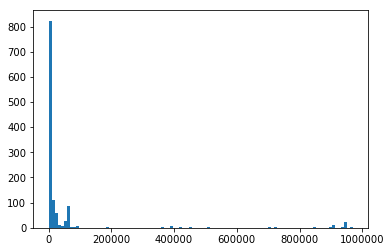

In [33]:
plt.hist(vc.index,bins=100);

In [38]:
a,b=np.where( (subdiff>0) | (subdiff<0))

In [44]:
pd.Series(b+2007).value_counts().sort_index()

2008     49856
2009      9349
2010      1039
2011    145302
2012     23854
2013       489
2014     74576
2015      3686
2016      2788
2017        31
dtype: int64

In [49]:
np.array(list(set(zip(subdf.values[a,b],subdf.values[a,b-1])))).astype(np.int32) 

array([[  16, 1030],
       [ 627,   73],
       [ 200,    2],
       ..., 
       [3601,  635],
       [  53, 1080],
       [   2,   58]], dtype=int32)

In [52]:
print "is tax code correlated with tax?"

is tax code correlated with tax?


In [90]:
subdf=df[['taxratecodearea','taxamount','taxvaluedollarcnt']].compute()

In [91]:
subdf['ratio']=subdf['taxamount']/subdf['taxvaluedollarcnt']

In [92]:
subdf.head()

taxratecodearea    taxamount  taxvaluedollarcnt     ratio
0         970008.0  3905.429932           203190.0  0.019221
1         970008.0  5232.080078           234220.0  0.022338
2         970008.0  4565.509766           202830.0  0.022509
3         970008.0  4971.689941           272280.0  0.018259
4         970001.0  2655.709961           117020.0  0.022694

In [93]:
subdf[subdf['ratio']>0.03].head()

taxratecodearea    taxamount  taxvaluedollarcnt     ratio
702         941341.0   948.200012            27500.0  0.034480
759         941341.0  1482.099976            12000.0  0.123508
869         941341.0  1428.709961            39360.0  0.036299
950         941311.0  1400.310059            41290.0  0.033914
983         941311.0   108.000000             1000.0  0.108000

In [94]:
subdf.loc[subdf.ratio>0.03,'ratio']=np.nan

In [95]:
subdf[subdf['taxratecodearea']==61400]

taxratecodearea  taxamount  taxvaluedollarcnt     ratio
9654            61400.0     3238.0           190800.0  0.016971
664534          61400.0     3238.0                NaN       NaN
309195          61400.0     3238.0            14000.0       NaN
334805          61400.0      172.0                NaN       NaN
793651          61400.0      162.0                NaN       NaN
577901          61400.0      194.0                NaN       NaN
735549          61400.0      188.0                NaN       NaN
833277          61400.0      202.0                NaN       NaN
630324          61400.0      200.0                NaN       NaN
459216          61400.0      186.0                NaN       NaN

In [96]:
subdf=subdf.dropna()

In [97]:
tmp=subdf[['taxratecodearea','ratio']].groupby('taxratecodearea').median()

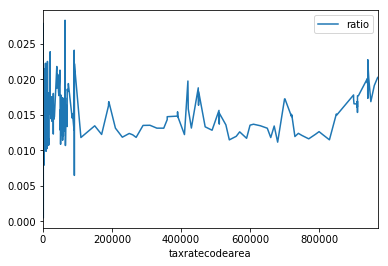

In [98]:
tmp.plot()

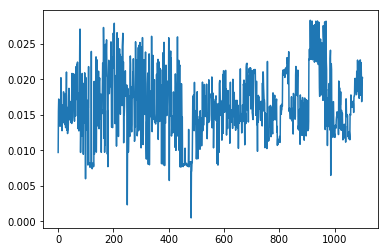

In [99]:
plt.plot(tmp.sort_index().values)

In [100]:
print "it does not seems to have pattern"

it does not seems to have pattern


### taxvaluedollarcnt

In [89]:
print "Check 'Derived value of the building structures and land added together. The max of 'totalmarketvalue', 'totalassessedvalue', 'totalappraisedvalue''"


Check 'Derived value of the building structures and land added together. The max of 'totalmarketvalue', 'totalassessedvalue', 'totalappraisedvalue''


In [121]:
subdf=df[['totalappraisedvalue','totalassessedvalue','totalmarketvalue','taxvaluedollarcnt']].compute()

In [122]:
subdf.fillna(0,inplace=True)

In [123]:
subdf['max3']=subdf[['totalappraisedvalue','totalassessedvalue','totalmarketvalue']].max(axis=1)

In [125]:
subdf.head()

totalappraisedvalue  totalassessedvalue  totalmarketvalue  \
0                  0.0            203190.0          203190.0   
1                  0.0            234220.0          234220.0   
2                  0.0            202830.0          202830.0   
3                  0.0            272280.0          272280.0   
4                  0.0            117020.0          117020.0   

   taxvaluedollarcnt      max3  
0           203190.0  203190.0  
1           234220.0  234220.0  
2           202830.0  202830.0  
3           272280.0  272280.0  
4           117020.0  117020.0

In [126]:
subdf[ (subdf['totalassessedvalue']<>subdf['totalmarketvalue']) &
     (subdf['totalassessedvalue']>0) & (subdf['totalmarketvalue']>0)]

totalappraisedvalue  totalassessedvalue  totalmarketvalue  \
395909                  0.0            119630.0           63950.0   
395914                  0.0            426510.0          217670.0   
395919                  0.0            410000.0          224290.0   
395923                  0.0            682850.0          353790.0   
395932                  0.0           2029740.0         1042830.0   
395933                  0.0           1064550.0          659880.0   
395946                  0.0             71500.0           36590.0   
395950                  0.0            157670.0           82040.0   
395956                  0.0            106390.0           55430.0   
395957                  0.0            161140.0           84620.0   
395959                  0.0            308490.0          160350.0   
395970                  0.0            302420.0          154760.0   
395972                  0.0             31450.0           15850.0   
395980                  0.0            572720.0          305890.0   
395983                  0.0           1173020.0          593640.0   
395986                  0.0            237940.0          122060.0   
395996                  0.0            344580.0          178570.0   
396004                  0.0            273060.0          139960.0   
396005                  0.0            207130.0          108150.0   
396014                  0.0            648780.0          340200.0   
396023                  0.0            582570.0          303560.0   
396036                  0.0            176740.0           90010.0   
396037                  0.0            166110.0           85680.0   
396040                  0.0            323920.0          168420.0   
396041                  0.0             81660.0           42670.0   
396046                  0.0             82580.0           43510.0   
396049                  0.0            510230.0          264680.0   
396051                  0.0            659480.0          381270.0   
396071                  0.0           1912720.0          980320.0   
396075                  0.0            390960.0          206710.0   
...                     ...                 ...               ...   
450032                  0.0             31062.0          517700.0   
450033                  0.0             31116.0          520700.0   
450034                  0.0             32899.0          552800.0   
450035                  0.0             17409.0          422900.0   
450036                  0.0             17363.0          388700.0   
450037                  0.0             17363.0          388700.0   
450038                  0.0             17363.0          388700.0   
450039                  0.0             17363.0          388700.0   
450040                  0.0             17363.0          388700.0   
450041                  0.0             17363.0          388700.0   
450042                  0.0             17363.0          388700.0   
450043                  0.0             17363.0          388700.0   
450044                  0.0             17363.0          388700.0   
450045                  0.0             17411.0          422900.0   
450046                  0.0             23843.0          462100.0   
450047                  0.0             23843.0          462100.0   
450048                  0.0             23843.0          462100.0   
450049                  0.0             23843.0          462100.0   
450050                  0.0             23843.0          462100.0   
450051                  0.0             24288.0          470400.0   
450052                  0.0             23843.0          462100.0   
450053                  0.0             23843.0          462100.0   
450054                  0.0             23843.0          462100.0   
450055                  0.0             23843.0          462100.0   
450056                  0.0             23843.0          462100.0   
450057                  0.0             23970.0          464600.0   
450058

In [109]:
print "is it true?", (subdf.taxvaluedollarcnt==subdf.max3).all()

is it true? True


### structuretaxvaluedollarcnt

In [111]:
print '''
check 
    Derived value of building and structures. The max of 'improvementmarketvalue', 'improvementassessedvalue', 'improvementappraisedvalue'
'''


check 
    Derived value of building and structures. The max of 'improvementmarketvalue', 'improvementassessedvalue', 'improvementappraisedvalue'



In [113]:
subdf=df[['improvementmarketvalue','improvementassessedvalue','improvementappraisedvalue','structuretaxvaluedollarcnt']].compute()

In [114]:
subdf.head()

improvementmarketvalue  improvementassessedvalue  \
0                131240.0                  131240.0   
1                228830.0                  228830.0   
2                198740.0                  198740.0   
3                257200.0                  257200.0   
4                 79670.0                   79670.0   

   improvementappraisedvalue  structuretaxvaluedollarcnt  
0                        NaN                    131240.0  
1                        NaN                    228830.0  
2                        NaN                    198740.0  
3                        NaN                    257200.0  
4                        NaN                     79670.0

In [115]:
subdf.fillna(0,inplace=True)

In [117]:
subdf['max3']=subdf[['improvementmarketvalue','improvementassessedvalue','improvementappraisedvalue']].max(axis=1)

In [118]:
print "is it true?", (subdf.structuretaxvaluedollarcnt==subdf.max3).all()

is it true? True


In [120]:
subdf[ (subdf['improvementmarketvalue']<>subdf['improvementassessedvalue']) &
     (subdf['improvementmarketvalue']>0) & (subdf['improvementassessedvalue']>0)]

improvementmarketvalue  improvementassessedvalue  \
396829                130720.0                    1580.0   
396830                167470.0                    1790.0   
396920                167260.0                    2390.0   
396921                212890.0                    2020.0   
396925                123730.0                    3770.0   
397002                449700.0                  333600.0   
400872                224170.0                    1750.0   
400874                302780.0                    2440.0   
400875                191140.0                    1230.0   
400876                190250.0                    1230.0   
400877                217840.0                    1750.0   
400881                219710.0                    1580.0   
400884                339000.0                    2100.0   
400887                118490.0                    1670.0   
400888                113010.0                    1570.0   
401256                 23100.0                    8090.0   
424288                 69700.0                   24400.0   
424289                 40830.0                   14290.0   
424290                 66110.0                   23140.0   
424291                 35380.0                   12380.0   
424292                 27070.0                    9470.0   
424293                 65210.0                   22820.0   
424294                 31950.0                   11180.0   
424295                 93840.0                   32840.0   
424296                 44440.0                   15550.0   
424297                 47030.0                   16460.0   
424298                 33430.0                   11700.0   
424299                 26530.0                    9290.0   
424300                 30520.0                   10680.0   
424301                 42880.0                   15010.0   
...                        ...                       ...   
450032                429000.0                   25740.0   
450033                432000.0                   25816.0   
450034                458000.0                   27257.0   
450035                357000.0                   15266.0   
450036                328000.0                   15700.0   
450037                328000.0                   15700.0   
450038                328000.0                   15700.0   
450039                328000.0                   15700.0   
450040                328000.0                   15700.0   
450041                328000.0                   15700.0   
450042                328000.0                   15700.0   
450043                328000.0                   15700.0   
450044                328000.0                   15700.0   
450045                357000.0                   15268.0   
450046                395000.0                   20381.0   
450047                395000.0                   20381.0   
450048                395000.0                   20381.0   
450049                395000.0                   20381.0   
450050                395000.0                   20381.0   
450051                402000.0                   20756.0   
450052                395000.0                   20381.0   
450053                395000.0                   20381.0   
450054                395000.0                   20381.0   
450055                395000.0                   20381.0   
450056                395000.0                   20381.0   
450057                397000.0                   20482.0   
450058                397000.0                   20482.0   
450059                397000.0                   20482.0   
450060                397000.0                   20482.0   
450061                397000.0                   20482.0   

        improvementappraisedvalue  structuretaxvaluedollarcnt      max3  
396829                        0.0                    130720.0  130720.0  
396830                        0.0                    167470.0  167470.0  
396920                        0.0                    167260.0  16

### landtaxvaluedollarcnt

In [127]:
print '''
check 
    Derived value of land. The max of 'landmarketvalue',  'landassessedvalue', 'landappraisedvalue'.
'''


check 
    Derived value of land. The max of 'landmarketvalue',  'landassessedvalue', 'landappraisedvalue'.



In [128]:
subdf=df[['landmarketvalue','landassessedvalue','landappraisedvalue','landtaxvaluedollarcnt']].compute()

In [129]:
subdf.head()

landmarketvalue  landassessedvalue  landappraisedvalue  \
0          71950.0            71950.0                 NaN   
1           5390.0             5390.0                 NaN   
2           4090.0             4090.0                 NaN   
3          15080.0            15080.0                 NaN   
4          37350.0            37350.0                 NaN   

   landtaxvaluedollarcnt  
0                71950.0  
1                 5390.0  
2                 4090.0  
3                15080.0  
4                37350.0

In [130]:
subdf.fillna(0,inplace=True)

In [131]:
subdf['max3']=subdf[['landmarketvalue','landassessedvalue','landappraisedvalue']].max(axis=1)

In [132]:
print "is it true?", (subdf.landtaxvaluedollarcnt==subdf.max3).all()

is it true? True


In [133]:
subdf[ (subdf['landmarketvalue']<>subdf['landassessedvalue']) &
     (subdf['landmarketvalue']>0) & (subdf['landassessedvalue']>0)]

landmarketvalue  landassessedvalue  landappraisedvalue  \
396965         531850.0            37580.0                 0.0   
401256          12560.0             4400.0                 0.0   
412969         118250.0            39500.0                 0.0   
412983           9400.0             3227.0                 0.0   
424288          10450.0             3660.0                 0.0   
424289           5130.0             1800.0                 0.0   
424290           8250.0             2890.0                 0.0   
424291          12180.0             4260.0                 0.0   
424292           4140.0             1450.0                 0.0   
424293           6770.0             2370.0                 0.0   
424294          11300.0             3960.0                 0.0   
424295          18790.0             6580.0                 0.0   
424296          12410.0             4340.0                 0.0   
424297          13070.0             4570.0                 0.0   
424298           8830.0             3090.0                 0.0   
424299           8910.0             3120.0                 0.0   
424300          10120.0             3540.0                 0.0   
424301           4620.0             1620.0                 0.0   
424302           7920.0             2770.0                 0.0   
424303           8550.0             2990.0                 0.0   
424304          16180.0             5660.0                 0.0   
424305           5230.0             1830.0                 0.0   
424306           9770.0             3420.0                 0.0   
424307           7920.0             2770.0                 0.0   
424308           7920.0             2770.0                 0.0   
424309           7740.0             2710.0                 0.0   
424310           3980.0             1390.0                 0.0   
424311           7520.0             2630.0                 0.0   
424312           9070.0             3170.0                 0.0   
424313           7740.0             2710.0                 0.0   
...                 ...                ...                 ...   
450032          88700.0             5322.0                 0.0   
450033          88700.0             5300.0                 0.0   
450034          94800.0             5642.0                 0.0   
450035          65900.0             2143.0                 0.0   
450036          60700.0             1663.0                 0.0   
450037          60700.0             1663.0                 0.0   
450038          60700.0             1663.0                 0.0   
450039          60700.0             1663.0                 0.0   
450040          60700.0             1663.0                 0.0   
450041          60700.0             1663.0                 0.0   
450042          60700.0             1663.0                 0.0   
450043          60700.0             1663.0                 0.0   
450044          60700.0             1663.0                 0.0   
450045          65900.0             2143.0                 0.0   
450046          67100.0             3462.0                 0.0   
450047          67100.0             3462.0                 0.0   
450048          67100.0             3462.0                 0.0   
450049          67100.0             3462.0                 0.0   
450050          67100.0             3462.0                 0.0   
450051          68400.0             3532.0                 0.0   
450052          67100.0             3462.0                 0.0   
450053          67100.0             3462.0                 0.0   
450054          67100.0             3462.0                 0.0   
450055          67100.0             3462.0                 0.0   
450056          67100.0             3462.0                 0.0   
450057          67600.0             3488.0                 0.0   
450058          67600.0             3488.0                 0.0   
450059          67600.0             3488.0                 0.0   
450060          67600.0             3488.0      

### What is edition?

In [136]:
subdf=get_col('edition')

In [140]:
for _ in range(20):
    n=int(np.random.random()*subdf.shape[0]-10)
    display(subdf.iloc[n:n+10])

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
114057452   NaN   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114057607   NaN   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114058880  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114058925  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114059530  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114059961  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114060579   NaN   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114060728   NaN   NaN   NaN   NaN   NaN   NaN  17.0  18.0  19.0  20.0   NaN
114060870  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN
114061374  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
114963508   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114963554   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114963569  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114964185  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114965087  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114965097  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114965903  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114965909   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114966365  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN
114966587   NaN  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
103436965  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437206  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437294  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437408  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437616  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437882  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437891  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103437943  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103438051  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0
103438677  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
104406694  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104406760  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104406918  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104406926  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104407434   NaN   NaN   NaN   NaN   NaN   NaN   NaN  20.0   NaN  21.0  22.0
104407593  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104407835  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104408161  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104408469  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104408482  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
115814496  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115814502  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115814656  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115814980  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115815619  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115815731  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115816132  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115816420  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115816583  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN
115816659  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
104161708  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104162083  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104162199  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104162635  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104162669  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104162704   NaN   NaN  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104163071   NaN   NaN  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104163159  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104163328   NaN   NaN  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
104163651   NaN   NaN  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                  
96265241  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96265378  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96265586  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96265747  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96266430  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96266459  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96266491  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96266731   NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96266752   NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0
96267171  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
106355552  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106356217  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106356443  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106357473  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106357545   NaN   NaN   NaN  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106358723  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106359011  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106359572   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0   NaN
106360066  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN
106360134  11.0  12.0  13.0  14.0  15.0  16.0  17.0   NaN  19.0  20.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
109050019   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109050335   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109050365   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109050969   NaN  14.0  15.0  16.0  17.0   NaN   NaN  19.0  20.0  21.0   NaN
109052258   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109052488   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109052734   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109053288   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109053292   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN
109053333   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                  
53867892  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53868611  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53868757   NaN   NaN  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53869381  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53869839   NaN   NaN  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53870969  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53871372  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53871554   NaN   NaN  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53871657  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN
53872074  11.0  12.0  13.0   NaN   NaN  14.0   NaN  16.0  17.0  18.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
113916409  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113916446  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113916467  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113916659  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113916847  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113916988  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113917544  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113918331  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113918626  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN
113919158  13.0  14.0  15.0  16.0  17.0  18.0  19.0   NaN  21.0  22.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
112029518  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112029808  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112030089  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112030187  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112030363  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112030420  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112030959  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112031446  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112031651  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN
112031799  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
102903976  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904342  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904395  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904399  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904514   NaN   NaN   NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904540  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904573  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904970  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102904973  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0
102905302  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
100689835  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100689944  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100689961  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100690382  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100690496  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100690500  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100690508  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100690985  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100691090  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN
100691368  15.0  16.0  17.0  18.0  19.0  20.0  21.0   NaN  23.0  24.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
104418287  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104418402  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104418418  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104418494  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104419252   NaN   NaN   NaN   NaN   NaN   NaN   NaN  20.0   NaN  21.0  22.0
104420130  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104420308  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104420387  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104421414  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104421597  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
108247870   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108248887   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108249032   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108249141   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108249645   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108249803   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108250078   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108250425   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108250939   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN
108251282   7.0   8.0   9.0  10.0  11.0  12.0  13.0   NaN  15.0  16.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                  
51878082   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51879576   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51880820   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51880824   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51881115   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.0  10.0   NaN
51881736   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51881906   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51882487   1.0   2.0   3.0   4.0   NaN   6.0   7.0   NaN   9.0  10.0   NaN
51882745   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN
51882984   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0  10.0   NaN

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                  
54144656   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54145009   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54145564   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54147084   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54148589   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54148908   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54150134   NaN   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54150335   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54152160   NaN   NaN   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0
54152539   1.0   2.0   3.0   4.0   5.0   6.0   7.0   NaN   9.0   NaN  11.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
104367591  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104367875   NaN   NaN  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104367934  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104368148  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104368380  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104368451  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104368547  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104368740  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104369112  13.0  14.0  15.0  16.0  17.0  18.0   NaN  20.0   NaN  21.0  22.0
104369297   NaN   NaN   NaN   NaN   NaN   NaN   NaN  20.0   NaN  21.0  22.0

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
parcelid                                                                   
115358585   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115359150   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115359358   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115359737   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115360178   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115360693   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115360721   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115361013   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115361555   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN
115362120   NaN   NaN   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   NaN

In [142]:
print '''
    seems it is just an increasing number of the edition of the records. Not thinking it is meanningfull.
    '''


    seems it is just an increasing number of the edition of the records. Not thinking it is meanningfull.
    


In [138]:
for col in subdf.columns:
    s=subdf.loc[:,col]
    print col
    display(s.value_counts().to_frame())

2007


2007
15.0  3024529
13.0   918052
12.0   915752
14.0   794214
11.0   577305
1.0    184584
2.0    169298
8.0    153260
5.0     90736
7.0     89594
10.0    80455
3.0     33292
4.0     27483
9.0     26807
6.0     19945

2008


2008
16.0  3274961
13.0   940125
15.0   891676
14.0   847534
12.0   647579
2.0    238765
9.0    161481
3.0    150962
6.0     83099
11.0    81050
8.0     79380
10.0    38082
4.0     33081
5.0     27703
7.0     20061

2009


2009
17.0  3415789
15.0   950104
14.0   904293
16.0   567629
13.0   529061
3.0    243432
10.0   191542
4.0    152245
1.0    126042
7.0     84058
9.0     74622
2.0     67253
12.0    66331
11.0    38785
5.0     36198
8.0     20110
6.0     11072

2010


2010
18.0  3468593
16.0   993174
15.0   979031
17.0   913924
14.0   514077
4.0    250025
1.0    228925
2.0    221759
11.0   202690
13.0   161407
5.0    141476
3.0    111273
8.0     84991
10.0    75404
6.0     64372
12.0    45733
9.0     20151
7.0     11120

2011


2011
19.0  3484542
17.0  1048943
18.0   919432
16.0   901217
15.0   537337
12.0   247231
5.0    246838
2.0    226273
3.0    224373
6.0    145231
14.0   131526
9.0     83892
11.0    77960
4.0     67597
7.0     64718
1.0     52779
13.0    46068
8.0     23602
10.0    20239

2012


2012
20.0  3495462
18.0  1051398
17.0   975731
19.0   593533
16.0   499820
13.0   256809
6.0    240643
4.0    223634
3.0    178862
15.0   145810
7.0    136265
14.0   102508
10.0    84312
12.0    78335
5.0     76418
2.0     57844
8.0     43571
11.0    20254
9.0     11315

2013


2013
21.0  3438128
19.0  1031717
18.0   837462
20.0   600234
17.0   475661
14.0   216946
7.0    206513
5.0    201872
4.0    163686
16.0   139579
8.0    115665
11.0    84864
3.0     71317
6.0     52851
13.0    46975
15.0    46482
9.0     44741
12.0    20294
10.0    11328
2.0      5784

2014


2014
22.0  2283372
19.0  1138620
20.0  1008566
21.0   971222
18.0   479303
15.0   180656
6.0    177795
5.0    158058
17.0   144945
9.0    129342
7.0    122003
16.0   104318
8.0     85092
4.0     70066
10.0    56273
12.0    44865
14.0    34234
3.0     16475
13.0    12571
11.0    11363
2.0      3561

2015


2015
23.0  3524920
20.0  1142896
21.0  1043609
22.0   985046
19.0   587427
16.0   254357
9.0    202153
7.0    201898
6.0    196449
10.0   174563
8.0    152959
18.0   145899
15.0   131678
17.0   121762
13.0    87474
5.0     74614
11.0    41133
4.0     40800
14.0    20360
2.0     18399
12.0    11366
3.0      5062

2016


2016
24.0  3544840
21.0  1215560
22.0  1044086
23.0   985889
20.0   587531
17.0   225423
8.0    201809
7.0    192445
11.0   189752
10.0   168082
19.0   154988
9.0    154691
6.0    135149
18.0   121788
16.0    90100
14.0    87508
5.0     73400
12.0    41151
15.0    20360
13.0    11366
4.0      1497

2017


2017
25.0  2108966
22.0   643475
24.0   411758
18.0    97894
8.0     93068
11.0    89612
17.0    86258
15.0    75141
23.0    68129
21.0    50601
12.0    47625
9.0     46428
16.0    42047
19.0    38757
10.0    37174
5.0     35018
6.0     32079
7.0     30455
3.0     18399
13.0    12446